In [10]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import scipy.stats as scs

from itertools import product                    # some useful functions

import statsmodels.api as sm

from statsmodels.graphics import tsaplots
%matplotlib inline

In [2]:
#Reading the provided csv file into a pandas Dataframe
Delivery = pd.read_csv('/Users/huanglin/Desktop/Pitney bowes/Delivery_Volume.csv', index_col=['DELIVERY_DATE'], parse_dates=['DELIVERY_DATE'])
Delivery.sort_index(inplace=True)
Delivery=Delivery.fillna(0)

In [4]:
#Data Sample
Delivery.tail()

,DELIVERED_VOLUME,Facility_A,Facility_B,Facility_C,Facility_D,Facility_E,Facility_F,Facility_G,Facility_H,Facility_I,Facility_J,Facility_K
DELIVERY_DATE,,,,,,,,,,,,
2019-05-29,1398.0,284.0,36.0,206.0,46.0,328.0,79.0,414.0,69.0,14.0,10.0,8.0
2019-05-30,628.0,264.0,21.0,179.0,9.0,382.0,71.0,311.0,104.0,9.0,12.0,8.0
2019-05-31,992.0,208.0,52.0,163.0,48.0,312.0,79.0,401.0,109.0,8.0,8.0,10.0
2019-06-01,0.0,0.0,0.0,0.0,0.0,175.0,51.0,0.0,7.0,0.0,0.0,0.0
2019-06-02,0.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


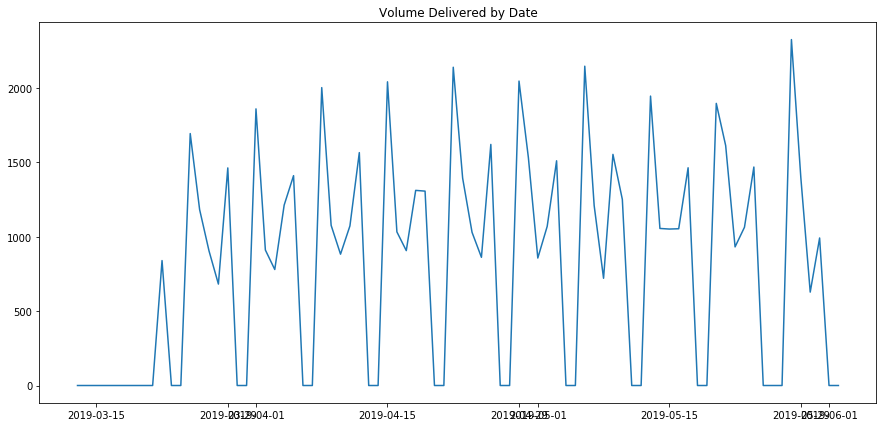

In [6]:
plt.figure(figsize=(15, 7))
#Delivery.plot.bar(figsize=(10,5))
plt.plot(Delivery.index,Delivery.DELIVERED_VOLUME)
plt.title('Volume Delivered by Date')
plt.grid(False)
plt.show()

In [19]:
delivery_level = Delivery['DELIVERED_VOLUME']
print(delivery_level.head(20))

DELIVERY_DATE
2019-03-13       0.0
2019-03-14       0.0
2019-03-15       0.0
2019-03-18       0.0
2019-03-19       0.0
2019-03-20       0.0
2019-03-21       0.0
2019-03-22     840.0
2019-03-23       0.0
2019-03-24       0.0
2019-03-25    1694.0
2019-03-26    1183.0
2019-03-27     905.0
2019-03-28     682.0
2019-03-29    1463.0
2019-03-30       0.0
2019-03-31       0.0
2019-04-01    1860.0
2019-04-02     911.0
2019-04-03     780.0
Name: DELIVERED_VOLUME, dtype: float64


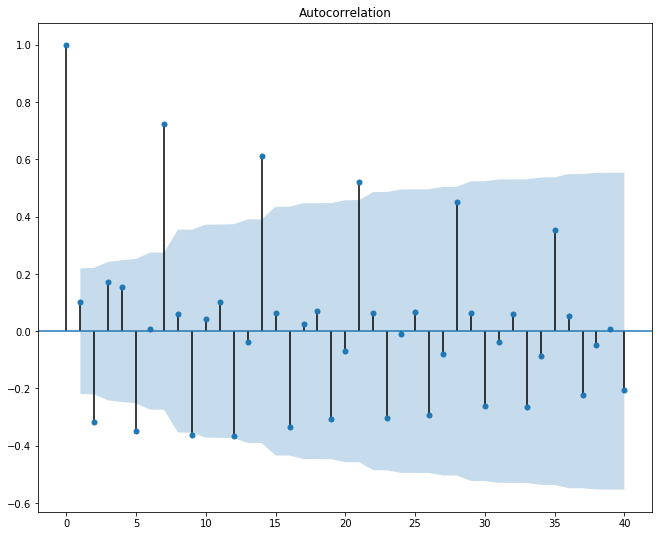

In [20]:
fg1_acf = tsaplots.plot_acf(delivery_level,lags=40)
plt.show()

In [ ]:
# test stationarity BoxCox or adf.test

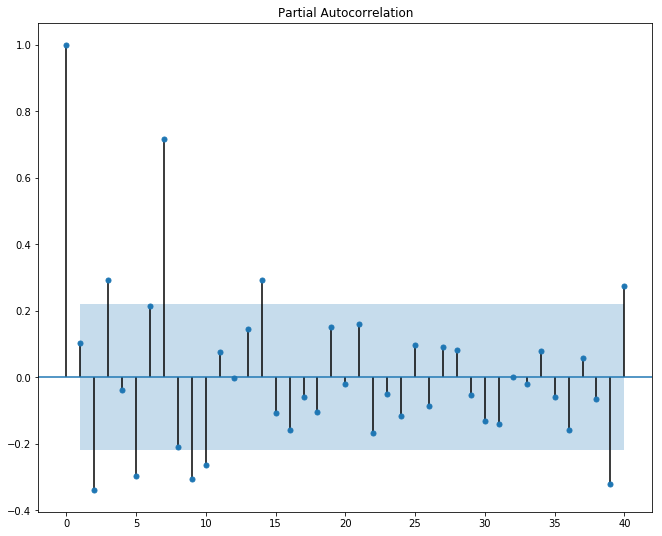

In [21]:
fg1_pacf =tsaplots.plot_pacf(delivery_level,lags=40)
plt.show()

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it difficult to predict. First, we will make the data stationary.

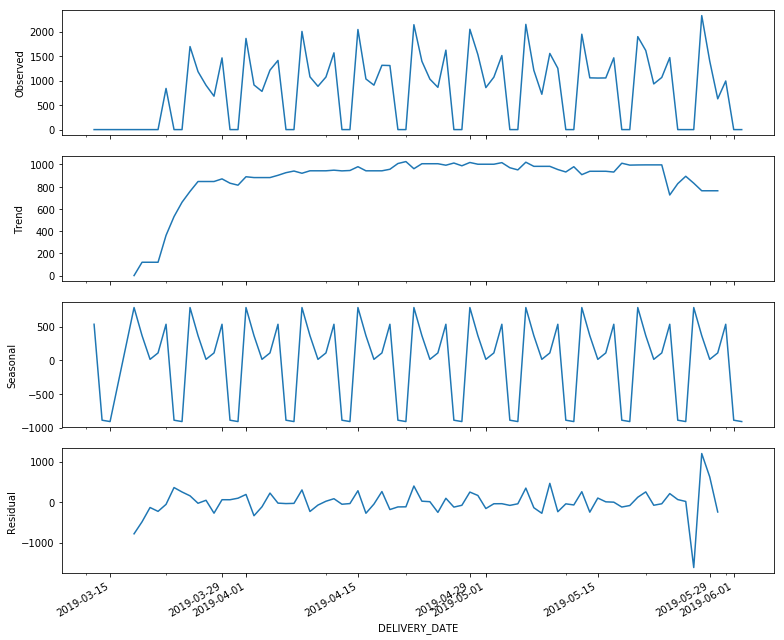

In [52]:

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(delivery_level, model='additive',freq=7)
fig1_result=result.plot()
plt.show()

Additive Model
An additive model suggests that the components are added together as follows:

y(t) = Level + Trend + Seasonality + Noise
1
y(t) = Level + Trend + Seasonality + Noise
An additive model is linear where changes over time are consistently made by the same amount.

A linear trend is a straight line.

A linear seasonality has the same frequency (width of cycles) and amplitude (height of cycles).

Multiplicative Model
A multiplicative model suggests that the components are multiplied together as follows:

y(t) = Level * Trend * Seasonality * Noise
1
y(t) = Level * Trend * Seasonality * Noise
A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time.

A nonlinear trend is a curved line.

A non-linear seasonality has an increasing or decreasing frequency and/or amplitude over time.

In [57]:
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

In an **ARIMA** model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

**p** is the parameter associated with the auto-regressive aspect of the model, which incorporates past values. For example, forecasting that if it rained a lot over the past few days, you state its likely that it will rain tomorrow as well.

**d** is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series. You can imagine an example of this as forecasting that the amount of rain tomorrow will be similar to the amount of rain today, if the daily amounts of rain have been similar over the past few days.

**q** is the parameter associated with the moving average part of the model.

In [49]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(data, start_p=0, d=None, start_q=0,
                           max_p=3, max_d=2,max_q=3, m=7,
                           start_P=0, seasonal=True,
                           D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pyramid'

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(delivery_level, order=(1, 0, 3))
results = model.fit()
results.plot_predict(1, 5)